## Perceptron - First Machine Learning Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data into a DataFrame for easier manipulation
data = pd.read_csv('obesity_data.csv')


In [2]:
X = data[['x1', 'x2']].values
y = data['z'].values

X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept term

# Percepton parameters
weights = np.zeros(X.shape[1])  # Initialize weights to zero
learning_rate = 0.1
num_epochs = 1000


# Perceptron training function
def perceptron(X, y, weights, learning_rate, num_epochs):
    for epoch in range(num_epochs):
        # Shuffle the data at the start of each epoch
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]
        
        for i in range(X.shape[0]):
            # Calculate the prediction
            prediction = np.dot(X[i], weights)
            # Update the weights based on the prediction
            if y[i] == 1 and prediction <= 0:
                weights += learning_rate * X[i]
            elif y[i] == 0 and prediction > 0:
                weights -= learning_rate * X[i]
    return weights

# Train the perceptron
weights = perceptron(X, y, weights, learning_rate, num_epochs)

print("Trained weights:", weights)

Trained weights: [ -452.1           38.1590775  -1643.74664012]


In [8]:
def predict(X, weights):
    return np.where(np.dot(X, weights) > 0, 1, 0)

# Make predictions
predictions = predict(X, weights)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 93.90%


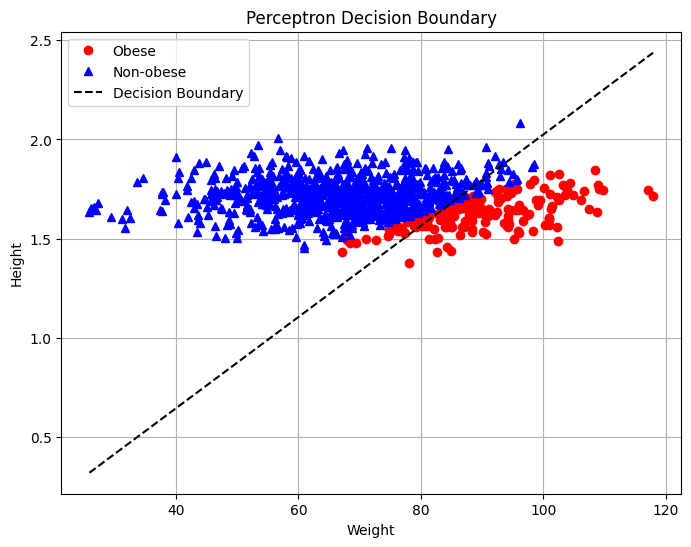

In [9]:

# Visualize the decision boundary
plt.figure(figsize=(8, 6))


# Plot the data points
plt.plot(data[data['z'] == 1]['x1'], data[data['z'] == 1]['x2'], 'ro', label='Obese')
plt.plot(data[data['z'] == 0]['x1'], data[data['z'] == 0]['x2'], 'b^', label='Non-obese')


#Plot the decision boundary
x1_min, x1_max = data['x1'].min(), data['x1'].max()
x2_min, x2_max = data['x2'].min(), data['x2'].max()
x1_range = np.linspace(x1_min, x1_max, 100)
x2_boundary = -(weights[0] + weights[1] * x1_range) / weights[2]
plt.plot(x1_range, x2_boundary, 'k--', label='Decision Boundary')

# Add labels and title 
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid()
plt.show()  # Display the plot

In [6]:
# Predict on new data if obese or not
new_data = np.array([[1, 70, 1.75], [1, 80, 1.20]])  # Example new data points
new_predictions = predict(new_data, weights)
print("New Predictions:", new_predictions)


New Predictions: [0 1]
